In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from datetime import datetime
%matplotlib inline

df = pd.read_csv('/Users/ericdenbin/Documents/flatiron_ds/2_phase/2_project/dsc-phase-2-project/data/kc_house_data.csv')
                 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.shape

(21597, 21)

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


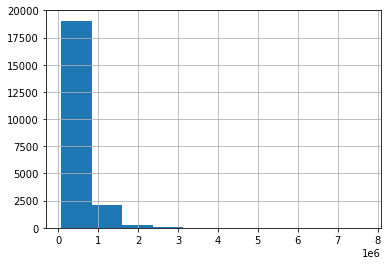

In [8]:
df['price'].hist();

In [9]:
df['basement'] = df['sqft_living'] - df['sqft_above']

df['basement'] = [1 if x > 0 else 0 for x in df["basement"]]

In [10]:
#df['basement'].value_counts()

In [11]:
df['basement'].map(lambda x:np.log(x))

<ipython-input-11-bcc18810e491>:1: RuntimeWarning: divide by zero encountered in log
  df['basement'].map(lambda x:np.log(x))


0       -inf
1        0.0
2       -inf
3        0.0
4       -inf
        ... 
21592   -inf
21593   -inf
21594   -inf
21595   -inf
21596   -inf
Name: basement, Length: 21597, dtype: float64

In [12]:
#north of the county is 1 and south is zero 


def label_lat (row):
    if row['lat'] >= 47.5000 :
        return 1
    else:
        return 0

In [13]:
def label_long (row):
    if row['long'] <= (-122.0000) :
        return 1
    else:
        return 0

In [14]:
df['county_lat'] = df.apply (lambda row: label_lat(row), axis=1)

In [15]:
df['county_long'] = df.apply (lambda row: label_long(row), axis=1)

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(15762, 24)

In [18]:
df.round(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.721,-122.319,1690,7639,1,1,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.521,-122.393,1360,5000,1,1,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.617,-122.045,1800,7503,0,1,1
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,2001,0.0,98053,47.656,-122.005,4760,101930,1,1,1
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,1995,0.0,98003,47.310,-122.327,2238,6819,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,...,2008,0.0,98116,47.577,-122.409,1330,1265,1,1,1
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,2009,0.0,98103,47.699,-122.346,1530,1509,0,1,1
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2014,0.0,98146,47.511,-122.362,1830,7200,0,1,1
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,2009,0.0,98144,47.594,-122.299,1020,2007,0,1,1


In [19]:
df = df.replace([np.inf, -np.inf], np.nan)

In [20]:
# 'View' is an ambiguous feature 
#'zipcode' is categorical data that would created 70 new columns if we created dummies
# 'yr_renovated' is ambiguous as well 
#'sqft_basement' is an odd datatype, and is a portion of sqft_living, and thus multicollinear.
 
df.drop(axis=1, columns=['view', 'zipcode', 'yr_renovated'], inplace=True)

In [21]:
#df['year'] = df['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").year)

In [22]:
df['yrs_old'] = 2021 - df['yr_built']

In [23]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
count,1.576200e+04,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,4.593364e+09,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,0.007613,3.410862,7.663748,1792.775473,1971.111217,47.559177,-122.213520,1990.219579,12900.415556,0.392844,0.692996,0.931988,49.888783
std,2.876078e+09,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,0.086924,0.651961,1.172238,828.403502,29.336823,0.138629,0.140706,684.142495,27977.230059,0.488398,0.461266,0.251774,29.336823
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,47.155900,-122.519000,399.000000,659.000000,0.000000,0.000000,0.000000,6.000000
25%,2.125159e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,1.000000,24.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,1975.000000,47.571000,-122.229000,1846.000000,7620.000000,0.000000,1.000000,1.000000,46.000000
75%,7.334501e+09,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,47.677400,-122.124000,2370.000000,10107.500000,1.000000,1.000000,1.000000,69.000000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,121.000000


In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,400.0,1951,47.7210,-122.319,1690,7639,1,1,1,70
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,910.0,1965,47.5208,-122.393,1360,5000,1,1,1,56
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,0.0,1987,47.6168,-122.045,1800,7503,0,1,1,34
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,...,1530.0,2001,47.6561,-122.005,4760,101930,1,1,1,20
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,...,?,1995,47.3097,-122.327,2238,6819,0,0,1,26


In [25]:
df.drop(axis=1,columns=['yr_built', 'id'], inplace=True)

In [26]:
df = df[df['bedrooms'] < 33]

In [27]:
df.dropna(inplace=True)
df.shape

(15761, 20)

In [28]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,47.7210,-122.319,1690,7639,1,1,1,70
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,47.5208,-122.393,1360,5000,1,1,1,56
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,47.6168,-122.045,1800,7503,0,1,1,34
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,47.6561,-122.005,4760,101930,1,1,1,20
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,47.3097,-122.327,2238,6819,0,0,1,26


In [29]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
count,1.576100e+04,15761.000000,15761.00000,15761.000000,1.576100e+04,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000
mean,5.413109e+05,3.377070,2.12082,2084.541844,1.528141e+04,1.495178,0.007614,3.410761,7.663790,1792.823235,47.559169,-122.213512,1990.261468,12900.935854,0.392805,0.692976,0.931984,49.887253
std,3.722368e+05,0.905078,0.76679,918.639378,4.182414e+04,0.539354,0.086927,0.651859,1.172264,828.408080,0.138630,0.140708,684.143985,27978.041388,0.488390,0.461274,0.251781,29.337125
min,8.200000e+04,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,659.000000,0.000000,0.000000,0.000000,6.000000
25%,3.210000e+05,3.000000,1.75000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,1.000000,24.000000
50%,4.500000e+05,3.000000,2.25000,1920.000000,7.603000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,47.571000,-122.229000,1847.000000,7620.000000,0.000000,1.000000,1.000000,46.000000
75%,6.450000e+05,4.000000,2.50000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.677400,-122.124000,2370.000000,10108.000000,1.000000,1.000000,1.000000,69.000000
max,7.700000e+06,11.000000,8.00000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,121.000000


In [30]:
df.shape


(15761, 20)

In [31]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
price,1.000000,0.315150,0.526168,0.706205,0.084508,0.259528,0.274214,0.034332,0.664164,0.612046,0.306600,0.021229,0.581607,0.079407,0.174230,0.374225,0.013523,-0.049360
bedrooms,0.315150,1.000000,0.530373,0.593802,0.026772,0.188429,-0.005846,0.015686,0.367264,0.492025,-0.008042,0.135432,0.405796,0.026668,0.163436,0.003593,-0.012190,-0.160061
bathrooms,0.526168,0.530373,1.000000,0.753842,0.080356,0.505176,0.065686,-0.130238,0.664742,0.685672,0.029959,0.222736,0.569281,0.081976,0.164436,0.071022,-0.087006,-0.504831
sqft_living,0.706205,0.593802,0.753842,1.000000,0.165330,0.359391,0.111489,-0.062253,0.764246,0.876176,0.058426,0.239501,0.756674,0.176813,0.202247,0.095356,-0.093031,-0.314203
sqft_lot,0.084508,0.026772,0.080356,0.165330,1.000000,-0.009937,0.025981,-0.016004,0.108943,0.174208,-0.084293,0.231632,0.145384,0.718488,-0.034344,-0.101957,-0.207763,-0.051567
floors,0.259528,0.188429,0.505176,0.359391,-0.009937,1.000000,0.018377,-0.260927,0.459827,0.529076,0.058247,0.129727,0.281942,-0.013589,-0.255731,0.103462,-0.095865,-0.487027
waterfront,0.274214,-0.005846,0.065686,0.111489,0.025981,0.018377,1.000000,0.016471,0.083031,0.077162,-0.015930,-0.042329,0.090586,0.029635,0.041645,-0.009743,0.023662,0.024073
condition,0.034332,0.015686,-0.130238,-0.062253,-0.016004,-0.260927,0.016471,1.000000,-0.147752,-0.157852,-0.022399,-0.105717,-0.096208,-0.005094,0.127354,-0.014208,0.094461,0.366888
grade,0.664164,0.367264,0.664742,0.764246,0.108943,0.459827,0.083031,-0.147752,1.000000,0.758284,0.117463,0.200657,0.717024,0.116662,0.048041,0.171097,-0.054264,-0.443270
sqft_above,0.612046,0.492025,0.685672,0.876176,0.174208,0.529076,0.077162,-0.157852,0.758284,1.000000,0.009099,0.342003,0.732622,0.185493,-0.213558,0.036581,-0.151131,-0.418823


In [32]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,47.7210,-122.319,1690,7639,1,1,1,70
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,47.5208,-122.393,1360,5000,1,1,1,56
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,47.6168,-122.045,1800,7503,0,1,1,34
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,3,11,3890,1530.0,47.6561,-122.005,4760,101930,1,1,1,20
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,47.3097,-122.327,2238,6819,0,0,1,26


In [33]:
df.shape

(15761, 20)

In [34]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
count,1.576100e+04,15761.000000,15761.00000,15761.000000,1.576100e+04,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000
mean,5.413109e+05,3.377070,2.12082,2084.541844,1.528141e+04,1.495178,0.007614,3.410761,7.663790,1792.823235,47.559169,-122.213512,1990.261468,12900.935854,0.392805,0.692976,0.931984,49.887253
std,3.722368e+05,0.905078,0.76679,918.639378,4.182414e+04,0.539354,0.086927,0.651859,1.172264,828.408080,0.138630,0.140708,684.143985,27978.041388,0.488390,0.461274,0.251781,29.337125
min,8.200000e+04,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,659.000000,0.000000,0.000000,0.000000,6.000000
25%,3.210000e+05,3.000000,1.75000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,1.000000,24.000000
50%,4.500000e+05,3.000000,2.25000,1920.000000,7.603000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,47.571000,-122.229000,1847.000000,7620.000000,0.000000,1.000000,1.000000,46.000000
75%,6.450000e+05,4.000000,2.50000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.677400,-122.124000,2370.000000,10108.000000,1.000000,1.000000,1.000000,69.000000
max,7.700000e+06,11.000000,8.00000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,121.000000


In [35]:
df.shape

(15761, 20)

In [36]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
count,1.576100e+04,15761.000000,15761.00000,15761.000000,1.576100e+04,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000,15761.000000
mean,5.413109e+05,3.377070,2.12082,2084.541844,1.528141e+04,1.495178,0.007614,3.410761,7.663790,1792.823235,47.559169,-122.213512,1990.261468,12900.935854,0.392805,0.692976,0.931984,49.887253
std,3.722368e+05,0.905078,0.76679,918.639378,4.182414e+04,0.539354,0.086927,0.651859,1.172264,828.408080,0.138630,0.140708,684.143985,27978.041388,0.488390,0.461274,0.251781,29.337125
min,8.200000e+04,1.000000,0.50000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,47.155900,-122.519000,399.000000,659.000000,0.000000,0.000000,0.000000,6.000000
25%,3.210000e+05,3.000000,1.75000,1430.000000,5.048000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,47.469200,-122.328000,1490.000000,5100.000000,0.000000,0.000000,1.000000,24.000000
50%,4.500000e+05,3.000000,2.25000,1920.000000,7.603000e+03,1.500000,0.000000,3.000000,7.000000,1570.000000,47.571000,-122.229000,1847.000000,7620.000000,0.000000,1.000000,1.000000,46.000000
75%,6.450000e+05,4.000000,2.50000,2550.000000,1.072000e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,47.677400,-122.124000,2370.000000,10108.000000,1.000000,1.000000,1.000000,69.000000
max,7.700000e+06,11.000000,8.00000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000,1.000000,1.000000,121.000000


<AxesSubplot:>

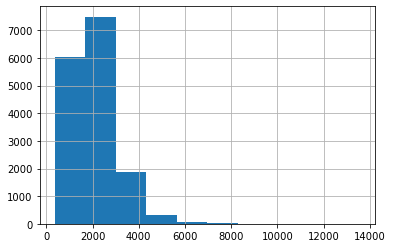

In [37]:
df['sqft_living'].hist()

In [38]:
non_normal = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'lat', 'sqft_lot15', 'sqft_living15', 'yrs_old']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))


In [39]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
price,1.000000,0.343492,0.551250,0.675734,0.136243,0.314793,0.178340,0.034674,0.703151,0.589574,0.452925,0.053146,0.605145,0.122773,0.205234,0.519647,-0.010121,-0.131649
bedrooms,0.343492,1.000000,0.528079,0.650698,0.188050,0.196550,-0.013010,0.018035,0.383113,0.547551,-0.023078,0.156495,0.429056,0.170335,0.154394,-0.016939,-0.017558,-0.170845
bathrooms,0.551250,0.528079,1.000000,0.761466,0.094213,0.505176,0.065686,-0.130238,0.664742,0.694252,0.030039,0.222736,0.571288,0.088885,0.164436,0.071022,-0.087006,-0.517743
sqft_living,0.675734,0.650698,0.761466,1.000000,0.319670,0.372764,0.081824,-0.054966,0.744481,0.864977,0.044622,0.258591,0.748603,0.298830,0.234890,0.071629,-0.091756,-0.339681
sqft_lot,0.136243,0.188050,0.094213,0.319670,1.000000,-0.235797,0.081106,0.070094,0.180736,0.312020,-0.148995,0.377366,0.366443,0.917643,-0.052565,-0.216748,-0.205049,0.143854
floors,0.314793,0.196550,0.505176,0.372764,-0.235797,1.000000,0.018377,-0.260927,0.459827,0.552052,0.058340,0.129727,0.277415,-0.225624,-0.255731,0.103462,-0.095865,-0.589207
waterfront,0.178340,-0.013010,0.065686,0.081824,0.081106,0.018377,1.000000,0.016471,0.083031,0.060852,-0.015875,-0.042329,0.082380,0.087351,0.041645,-0.009743,0.023662,0.027075
condition,0.034674,0.018035,-0.130238,-0.054966,0.070094,-0.260927,0.016471,1.000000,-0.147752,-0.151002,-0.022403,-0.105717,-0.093859,0.080120,0.127354,-0.014208,0.094461,0.391236
grade,0.703151,0.383113,0.664742,0.744481,0.180736,0.459827,0.083031,-0.147752,1.000000,0.744526,0.117575,0.200657,0.691884,0.182247,0.048041,0.171097,-0.054264,-0.444517
sqft_above,0.589574,0.547551,0.694252,0.864977,0.312020,0.552052,0.060852,-0.151002,0.744526,1.000000,-0.009117,0.362163,0.713899,0.293626,-0.219470,0.008588,-0.148782,-0.454058


In [40]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
price,1.000000,0.343492,0.551250,0.675734,0.136243,0.314793,0.178340,0.034674,0.703151,0.589574,0.452925,0.053146,0.605145,0.122773,0.205234,0.519647,-0.010121,-0.131649
bedrooms,0.343492,1.000000,0.528079,0.650698,0.188050,0.196550,-0.013010,0.018035,0.383113,0.547551,-0.023078,0.156495,0.429056,0.170335,0.154394,-0.016939,-0.017558,-0.170845
bathrooms,0.551250,0.528079,1.000000,0.761466,0.094213,0.505176,0.065686,-0.130238,0.664742,0.694252,0.030039,0.222736,0.571288,0.088885,0.164436,0.071022,-0.087006,-0.517743
sqft_living,0.675734,0.650698,0.761466,1.000000,0.319670,0.372764,0.081824,-0.054966,0.744481,0.864977,0.044622,0.258591,0.748603,0.298830,0.234890,0.071629,-0.091756,-0.339681
sqft_lot,0.136243,0.188050,0.094213,0.319670,1.000000,-0.235797,0.081106,0.070094,0.180736,0.312020,-0.148995,0.377366,0.366443,0.917643,-0.052565,-0.216748,-0.205049,0.143854
floors,0.314793,0.196550,0.505176,0.372764,-0.235797,1.000000,0.018377,-0.260927,0.459827,0.552052,0.058340,0.129727,0.277415,-0.225624,-0.255731,0.103462,-0.095865,-0.589207
waterfront,0.178340,-0.013010,0.065686,0.081824,0.081106,0.018377,1.000000,0.016471,0.083031,0.060852,-0.015875,-0.042329,0.082380,0.087351,0.041645,-0.009743,0.023662,0.027075
condition,0.034674,0.018035,-0.130238,-0.054966,0.070094,-0.260927,0.016471,1.000000,-0.147752,-0.151002,-0.022403,-0.105717,-0.093859,0.080120,0.127354,-0.014208,0.094461,0.391236
grade,0.703151,0.383113,0.664742,0.744481,0.180736,0.459827,0.083031,-0.147752,1.000000,0.744526,0.117575,0.200657,0.691884,0.182247,0.048041,0.171097,-0.054264,-0.444517
sqft_above,0.589574,0.547551,0.694252,0.864977,0.312020,0.552052,0.060852,-0.151002,0.744526,1.000000,-0.009117,0.362163,0.713899,0.293626,-0.219470,0.008588,-0.148782,-0.454058


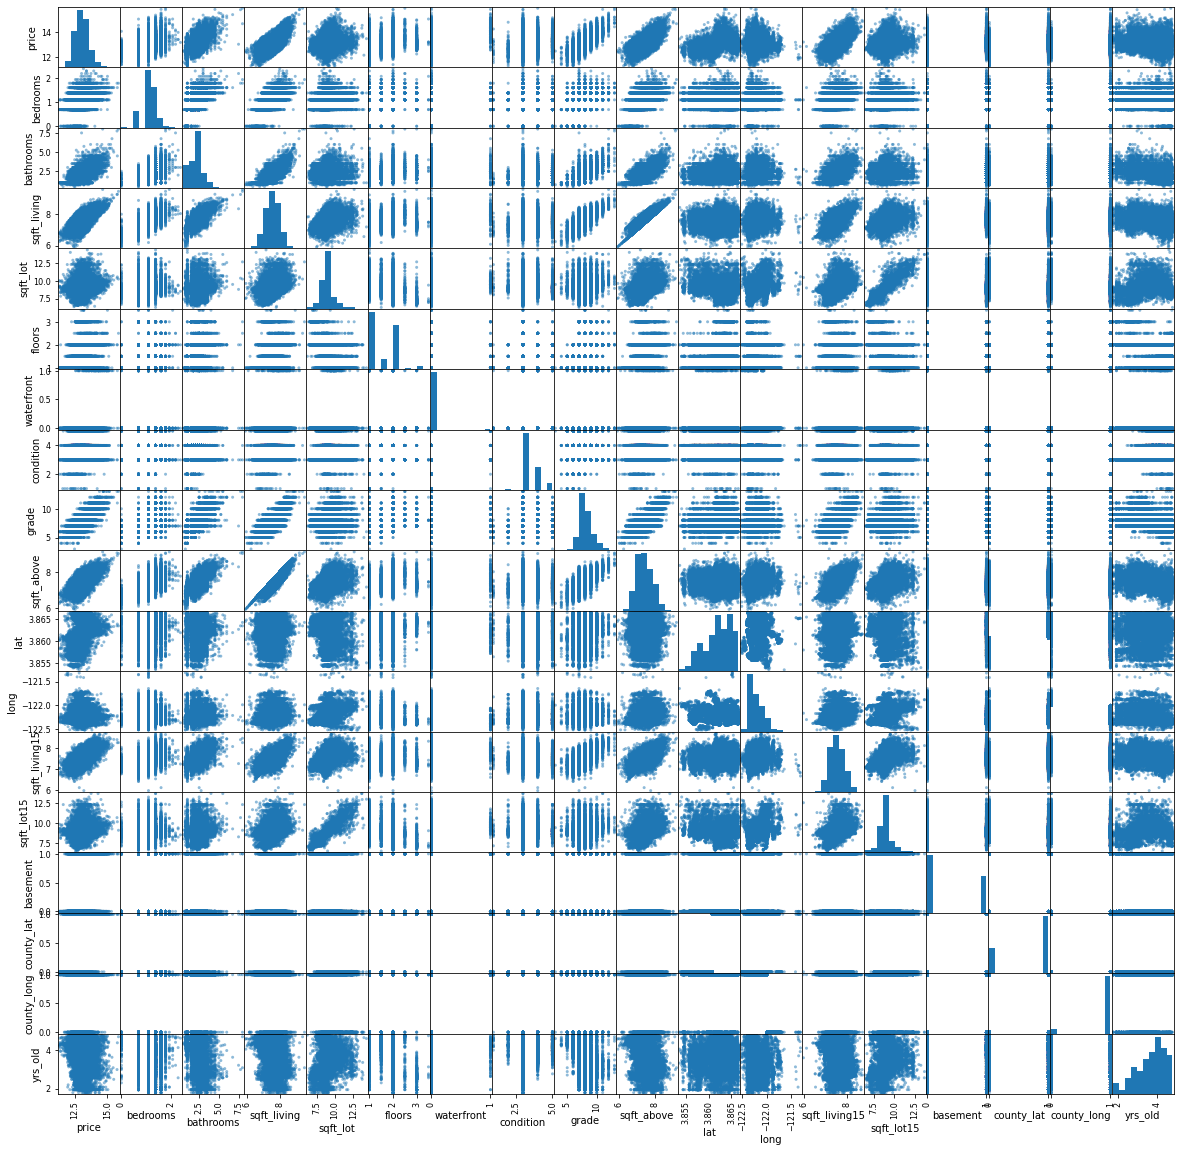

In [41]:
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show();

# Model 1

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Set X and y
X_col = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'sqft_above', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X = df[X_col]
y = df['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.fit_transform(X_test)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale, y_train)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)



[-0.03901779  0.04667669  0.1613357   0.013823    0.02294556  0.0546569
  0.04674219  0.18993367  0.00319537  0.18905076 -0.01758079  0.07840165
 -0.04074379  0.08334973]
13.04766146442349


In [43]:
# Make predictions
y_hat_train = result.predict(X_train_scale)
y_hat_test = result.predict(X_test_scale)

print(y_hat_train)

print(y_hat_test)

[13.50190681 12.61545674 12.24778967 ... 13.69799565 13.69035979
 13.05943885]
[12.50100555 13.84864237 13.15879731 ... 13.15183305 13.1984679
 12.55225319]


In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_r2 = r2_score(y_train, y_hat_train)
print(y_train_r2)
y_test_r2 = r2_score(y_test, y_hat_test)
print(y_test_r2)

0.7543870793552043
0.7436383751622151


In [45]:
y_train_rmse = mean_squared_error(np.exp(y_train), np.exp(y_hat_train), squared = False)
print(y_train_rmse)
y_test_rmse = mean_squared_error(np.exp(y_test), np.exp(y_hat_test), squared = False)
print(y_test_rmse)

189445.01299703747
215665.72750254459


In [46]:
import statsmodels.api as sm

# Prepare data
y = df['price']
X_col = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'sqft_above', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yrs_old']
X = df[X_col]

#scaler = StandardScaler()

#X_scale = scaler.fit_transform(X)

# Using the sm.OLS() method, we need to manually add constant to the model
X = sm.add_constant(X)

# Create the model object
model = sm.OLS(y, X)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3407.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:23   Log-Likelihood:                -1264.1
No. Observations:               15761   AIC:                             2558.
Df Residuals:                   15746   BIC:                             2673.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -259.3025      3.718    -69.734      0.000    -266.591    -252.014
bedrooms         -0.1306      0.010    -12.888      0.000      -0.150      -0.111
bathrooms         0.0628      0.005     12.941      0.000       0.053       0.072
sqft_living       0.3693      0.014     26.808      0.000       0.342       0.396
sqft_lot          0.0195      0.006      3.212      0.001       0.008       0.031
floors            0.0438      0.006      7.175      0.000       0.032       0.056
waterfront        0.6401      0.024     26.193      0.000       0.592       0.688
condition         0.0723      0.004     20.406      0.000       0.065       0.079
grade             0.1618      0.003     51.290      0.000       0.156       0.168
sqft_above        0.0183      0.013      1.442      0.149      -0.007       0.043
lat              64.8445      0.762     85.131      0.000      63.351      66.338
long             -0.1266      0.018     -6.847      0.000      -0.163      -0.090
sqft_living15     0.2447      0.011     22.758      0.000       0.224       0.266
sqft_lot15       -0.0523      0.007     -7.981      0.000      -0.065      -0.039
yrs_old           0.1183      0.004     26.319      0.000       0.110       0.127
==============================================================================
Omnibus:                      269.054   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              413.634
Skew:                           0.180   Prob(JB):                     1.52e-90
Kurtosis:                       3.707   Cond. No.                     2.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 2

In [47]:
# Dropping sqft_above column as it was shown to be insignificant.

In [48]:
# Set X and y
X_col2 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X2 = df[X_col2]
y2 = df['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=11)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale2 = scaler.fit_transform(X_train2)
X_test_scale2 = scaler.fit_transform(X_test2)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale2, y_train2)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)



[-0.03664971  0.04508978  0.15922502  0.01946995  0.02760403  0.05469653
  0.04530394  0.18805873  0.18728473 -0.01771455  0.08488203 -0.04391319
  0.08658387]
13.04851151705166


In [49]:
# Make predictions
y_hat_train2 = result.predict(X_train_scale2)
y_hat_test2 = result.predict(X_test_scale2)

print(y_hat_train2)

print(y_hat_test2)

[13.06632908 12.63456425 13.50373337 ... 12.33221687 12.39676258
 13.63185355]
[12.54429964 13.32545931 13.2762865  ... 13.02261555 13.45539544
 12.73910353]


In [50]:
y_train_r2_2 = r2_score(y_train2, y_hat_train2)
print(y_train_r2_2)
y_test_r2_2 = r2_score(y_test2, y_hat_test2)
print(y_test_r2_2)

0.7484095549705352
0.7612776693698444


In [51]:
y_train_rmse2 = mean_squared_error(np.exp(y_train2), np.exp(y_hat_train2), squared = False)
print(y_train_rmse2)
y_test_rmse2 = mean_squared_error(np.exp(y_test2), np.exp(y_hat_test2), squared = False)
print(y_test_rmse2)

192205.65416153273
208836.8761352213


In [52]:
#Prepare data
y2 = df['price']
X_col2 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X2 = df[X_col2]

scaler = StandardScaler()

X_scale2 = scaler.fit_transform(X2)

# Using the sm.OLS() method, we need to manually add constant to the model
X2 = sm.add_constant(X_scale2)

# Create the model object
model = sm.OLS(y2, X2)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3669.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:23   Log-Likelihood:                -1265.1
No. Observations:               15761   AIC:                             2558.
Df Residuals:                   15747   BIC:                             2666.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6245.545      0.000      13.045      13.054
x1            -0.0366      0.003    -12.822      0.000      -0.042      -0.031
x2             0.0475      0.004     12.860      0.000       0.040       0.055
x3             0.1611      0.005     33.218      0.000       0.152       0.171
x4             0.0186      0.005      3.399      0.001       0.008       0.029
x5             0.0259      0.003      8.997      0.000       0.020       0.032
x6             0.0556      0.002     26.167      0.000       0.051       0.060
x7             0.0469      0.002     20.358      0.000       0.042       0.051
x8             0.1906      0.004     52.382      0.000       0.183       0.198
x9             0.1889      0.002     85.339      0.000       0.185       0.193
x10           -0.0172      0.003     -6.701      0.000      -0.022      -0.012
x11            0.0804      0.004     22.956      0.000       0.074       0.087
x12           -0.0426      0.005     -7.977      0.000      -0.053      -0.032
x13            0.0846      0.003     26.285      0.000       0.078       0.091
==============================================================================
Omnibus:                      272.892   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.367
Skew:                           0.182   Prob(JB):                     5.23e-92
Kurtosis:                       3.712   Cond. No.                         7.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 1

In [53]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 10)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[ True  True  True False False  True  True  True  True False  True  True
  True]
[1 1 1 3 2 1 1 1 1 4 1 1 1]


# Model 3 –– 10 features selected through RFE

In [54]:
y3 = df['price']
X_col3 = ['bedrooms',  
         'sqft_living', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X3 = df[X_col3]

# Perform split
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.25, random_state=12)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale3 = scaler.fit_transform(X_train3)
X_test_scale3 = scaler.fit_transform(X_test3)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale3, y_train3)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-0.03350331  0.18657985  0.03045918  0.0569279   0.04825422  0.19903303
  0.18902417  0.07710912 -0.03460576  0.08263168]
13.048305670114944


In [55]:
# Make predictions
y_hat_train3 = result.predict(X_train_scale3)
y_hat_test3 = result.predict(X_test_scale3)

print(y_hat_train3)

print(y_hat_test3)

[13.01138307 13.51614675 12.38855272 ... 12.97801221 12.63038114
 14.05786079]
[12.64940849 12.575704   13.08295926 ... 12.54727408 13.14065799
 13.23168627]


In [56]:
y_train_r2_3 = r2_score(y_train3, y_hat_train3)
print(y_train_r2_3)
y_test_r2_3 = r2_score(y_test3, y_hat_test3)
print(y_test_r2_3)

0.7491432094815336
0.7458135642507364


In [57]:
y_train_rmse3 = mean_squared_error(np.exp(y_train3), np.exp(y_hat_train3), squared = False)
print(y_train_rmse3)
y_test_rmse3 = mean_squared_error(np.exp(y_test3), np.exp(y_hat_test3), squared = False)
print(y_test_rmse3)

197856.00982573445
212478.0580718334


In [58]:
y3 = df['price']
X_col3 = ['bedrooms', 
         'sqft_living',  
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X3 = df[X_col3]

scaler = StandardScaler()

X_scale3 = scaler.fit_transform(X3)

# Using the sm.OLS() method, we need to manually add constant to the model
X3 = sm.add_constant(X_scale3)

# Create the model object
model = sm.OLS(y3, X3)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     4683.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:24   Log-Likelihood:                -1373.7
No. Observations:               15761   AIC:                             2769.
Df Residuals:                   15750   BIC:                             2854.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6203.252      0.000      13.045      13.054
x1            -0.0322      0.003    -11.312      0.000      -0.038      -0.027
x2             0.1890      0.004     42.805      0.000       0.180       0.198
x3             0.0299      0.003     10.455      0.000       0.024       0.036
x4             0.0578      0.002     27.144      0.000       0.054       0.062
x5             0.0475      0.002     20.540      0.000       0.043       0.052
x6             0.1987      0.004     55.025      0.000       0.192       0.206
x7             0.1890      0.002     85.122      0.000       0.185       0.193
x8             0.0753      0.003     21.668      0.000       0.069       0.082
x9            -0.0355      0.003    -14.044      0.000      -0.040      -0.031
x10            0.0821      0.003     28.161      0.000       0.076       0.088
==============================================================================
Omnibus:                      343.358   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.242
Skew:                           0.226   Prob(JB):                    1.19e-115
Kurtosis:                       3.776   Cond. No.                         4.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 2

In [59]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 9)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False  True  True False False  True  True  True  True False  True  True
  True]
[2 1 1 4 3 1 1 1 1 5 1 1 1]


# Model 4 –– 9 features selected through RFE

In [60]:
y4 = df['price']
X_col4 = ['bedrooms',  
         'sqft_living',  
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X4 = df[X_col4]

# Perform split
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25, random_state=13)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale4 = scaler.fit_transform(X_train4)
X_test_scale4 = scaler.fit_transform(X_test4)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale4, y_train4)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-0.03193714  0.19141005  0.05709657  0.04780826  0.2056916   0.19218178
  0.0761519  -0.04324408  0.07060645]
13.051866810690727


In [61]:
# Make predictions
y_hat_train4 = result.predict(X_train_scale4)
y_hat_test4 = result.predict(X_test_scale4)

print(y_hat_train4)

print(y_hat_test4)

[12.77561663 12.55431257 12.87214351 ... 12.6457792  12.97628757
 12.98888131]
[13.51649013 13.31290278 13.0867426  ... 13.0450078  13.19333453
 13.34392239]


In [62]:
y_train_r2_4 = r2_score(y_train4, y_hat_train4)
print(y_train_r2_4)
y_test_r2_4 = r2_score(y_test4, y_hat_test4)
print(y_test_r2_4)

0.7481238252578724
0.7413375827491324


In [63]:
y_train_rmse4 = mean_squared_error(np.exp(y_train4), np.exp(y_hat_train4), squared = False)
print(y_train_rmse4)
y_test_rmse4 = mean_squared_error(np.exp(y_test4), np.exp(y_hat_test4), squared = False)
print(y_test_rmse4)

197472.0616767928
210911.36229435704


In [64]:
y4 = df['price']
X_col4 = ['bedrooms', 
         'sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X4 = df[X_col4]

scaler = StandardScaler()

X_scale4 = scaler.fit_transform(X4)

# Using the sm.OLS() method, we need to manually add constant to the model
X4 = sm.add_constant(X_scale4)

# Create the model object
model = sm.OLS(y4, X4)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     5156.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:24   Log-Likelihood:                -1428.2
No. Observations:               15761   AIC:                             2876.
Df Residuals:                   15751   BIC:                             2953.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6182.035      0.000      13.045      13.054
x1            -0.0326      0.003    -11.410      0.000      -0.038      -0.027
x2             0.1947      0.004     44.255      0.000       0.186       0.203
x3             0.0585      0.002     27.386      0.000       0.054       0.063
x4             0.0461      0.002     19.923      0.000       0.042       0.051
x5             0.2048      0.004     57.228      0.000       0.198       0.212
x6             0.1901      0.002     85.379      0.000       0.186       0.194
x7             0.0743      0.003     21.307      0.000       0.067       0.081
x8            -0.0429      0.002    -17.637      0.000      -0.048      -0.038
x9             0.0700      0.003     26.072      0.000       0.065       0.075
==============================================================================
Omnibus:                      330.778   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.563
Skew:                           0.225   Prob(JB):                    3.32e-109
Kurtosis:                       3.747   Cond. No.                         4.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# I noticed that the r2 value decreased minimally with each of the last 2 features I removed.
# I'm going to start using only OLS models to check the r2 value for the rest of the features descending to 1.

# RFE 3

In [66]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 8)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False  True  True False False  True  True  True  True False  True False
  True]
[3 1 1 5 4 1 1 1 1 6 1 2 1]


# Model 5

In [67]:
y5 = df['price']
X_col5 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X5 = df[X_col5]

# Perform split
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.25, random_state=13)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale5 = scaler.fit_transform(X_train5)
X_test_scale5 = scaler.fit_transform(X_test5)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale5, y_train5)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[ 0.16444872  0.05915168  0.04695773  0.21129766  0.19365682  0.07755472
 -0.04194503  0.06971227]
13.051866810690727


In [68]:
# Make predictions
y_hat_train5 = result.predict(X_train_scale5)
y_hat_test5 = result.predict(X_test_scale5)

print(y_hat_train5)

print(y_hat_test5)

[12.78437512 12.53605181 12.92326484 ... 12.6367916  12.95876248
 13.00689502]
[13.53021461 13.3154288  13.07929521 ... 13.01482257 13.20880699
 13.28227302]


In [69]:
y_train_r2_5 = r2_score(y_train5, y_hat_train5)
print(y_train_r2_5)
y_test_r2_5 = r2_score(y_test5, y_hat_test5)
print(y_test_r2_5)

0.7461048058599544
0.7390327482847387


In [70]:
y_train_rmse5 = mean_squared_error(np.exp(y_train5), np.exp(y_hat_train5), squared = False)
print(y_train_rmse5)
y_test_rmse5 = mean_squared_error(np.exp(y_test5), np.exp(y_hat_test5), squared = False)
print(y_test_rmse5)

198044.89395921532
212339.07606323535


In [71]:
y5 = df['price']
X_col5 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X5 = df[X_col5]

scaler = StandardScaler()

X_scale5 = scaler.fit_transform(X5)

# Using the sm.OLS() method, we need to manually add constant to the model
X5 = sm.add_constant(X_scale5)

# Create the model object
model = sm.OLS(y5, X5)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     5737.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:25   Log-Likelihood:                -1493.1
No. Observations:               15761   AIC:                             3004.
Df Residuals:                   15752   BIC:                             3073.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6156.837      0.000      13.045      13.054
x1             0.1667      0.004     45.447      0.000       0.160       0.174
x2             0.0605      0.002     28.310      0.000       0.056       0.065
x3             0.0452      0.002     19.470      0.000       0.041       0.050
x4             0.2109      0.004     59.372      0.000       0.204       0.218
x5             0.1915      0.002     85.835      0.000       0.187       0.196
x6             0.0760      0.003     21.726      0.000       0.069       0.083
x7            -0.0417      0.002    -17.080      0.000      -0.047      -0.037
x8             0.0693      0.003     25.718      0.000       0.064       0.075
==============================================================================
Omnibus:                      351.404   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              525.533
Skew:                           0.240   Prob(JB):                    7.62e-115
Kurtosis:                       3.755   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# RFE 4

In [72]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 7)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False  True  True False False  True False  True  True False  True False
  True]
[4 1 1 6 5 1 2 1 1 7 1 3 1]


# Model 6

In [73]:
y6 = df['price']
X_col6 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X6 = df[X_col6]

# Perform split
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y6, test_size=0.25, random_state=13)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale6 = scaler.fit_transform(X_train6)
X_test_scale6 = scaler.fit_transform(X_test6)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale6, y_train6)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[ 0.16444872  0.05915168  0.04695773  0.21129766  0.19365682  0.07755472
 -0.04194503  0.06971227]
13.051866810690727


In [74]:
# Make predictions
y_hat_train6 = result.predict(X_train_scale6)
y_hat_test6 = result.predict(X_test_scale6)

print(y_hat_train6)

print(y_hat_test6)

[12.78437512 12.53605181 12.92326484 ... 12.6367916  12.95876248
 13.00689502]
[13.53021461 13.3154288  13.07929521 ... 13.01482257 13.20880699
 13.28227302]


In [75]:
y_train_r2_6 = r2_score(y_train6, y_hat_train6)
print(y_train_r2_6)
y_test_r2_6 = r2_score(y_test6, y_hat_test6)
print(y_test_r2_6)

0.7461048058599544
0.7390327482847387


In [76]:
y_train_rmse6 = mean_squared_error(np.exp(y_train6), np.exp(y_hat_train6), squared = False)
print(y_train_rmse5)
y_test_rmse6 = mean_squared_error(np.exp(y_test6), np.exp(y_hat_test6), squared = False)
print(y_test_rmse6)

198044.89395921532
212339.07606323535


In [77]:
y6 = df['price']
X_col6 = ['sqft_living',   
         'waterfront', 
         'condition', 
         'grade', 
         'lat',  
         'sqft_living15',  
         'yrs_old']
X6 = df[X_col6]

scaler = StandardScaler()

X_scale6 = scaler.fit_transform(X6)

# Using the sm.OLS() method, we need to manually add constant to the model
X6 = sm.add_constant(X_scale6)

# Create the model object
model = sm.OLS(y6, X6)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     6397.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:25   Log-Likelihood:                -1637.7
No. Observations:               15761   AIC:                             3291.
Df Residuals:                   15753   BIC:                             3353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6100.797      0.000      13.045      13.054
x1             0.1607      0.004     43.617      0.000       0.153       0.168
x2             0.0590      0.002     27.367      0.000       0.055       0.063
x3             0.0452      0.002     19.265      0.000       0.041       0.050
x4             0.2131      0.004     59.497      0.000       0.206       0.220
x5             0.1995      0.002     90.572      0.000       0.195       0.204
x6             0.0594      0.003     17.524      0.000       0.053       0.066
x7             0.0575      0.003     21.869      0.000       0.052       0.063
==============================================================================
Omnibus:                      232.132   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.516
Skew:                           0.179   Prob(JB):                     6.24e-73
Kurtosis:                       3.615   Cond. No.                         3.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
# The r2 value is continuing to decrease. I'm going to check one more model and switch strategies.

# RFE 5

In [79]:
from sklearn.feature_selection import RFE

y_rfe = df['price']
X_col_rfe = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old']
X_rfe = df[X_col_rfe]

scaler = StandardScaler()

X_scale_rfe = scaler.fit_transform(X_rfe)

# Create the model object
ols = LinearRegression()

# Create the recursive feature elimination object to select up to 5 features
rfe = RFE(ols, n_features_to_select = 6)

# Select the features for the model
rfe.fit(X_scale_rfe, y_rfe)

# Return boolean to confirm selected features
print(rfe.support_)

# Return the rank of each feature in the dataset
print(rfe.ranking_)

[False False  True False False  True False  True  True False  True False
  True]
[5 2 1 7 6 1 3 1 1 8 1 4 1]


# Model 7

In [80]:
y7 = df['price']
X_col7 = ['sqft_living',   
         'waterfront',  
         'grade', 
         'lat',  
         'sqft_living15',  
         'yrs_old']
X7 = df[X_col7]

scaler = StandardScaler()

X_scale7 = scaler.fit_transform(X7)

# Using the sm.OLS() method, we need to manually add constant to the model
X7 = sm.add_constant(X_scale7)

# Create the model object
model = sm.OLS(y7, X7)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     7231.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:26   Log-Likelihood:                -1821.2
No. Observations:               15761   AIC:                             3656.
Df Residuals:                   15754   BIC:                             3710.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6030.367      0.000      13.045      13.054
x1             0.1678      0.004     45.253      0.000       0.161       0.175
x2             0.0589      0.002     27.018      0.000       0.055       0.063
x3             0.2119      0.004     58.489      0.000       0.205       0.219
x4             0.1964      0.002     88.365      0.000       0.192       0.201
x5             0.0566      0.003     16.517      0.000       0.050       0.063
x6             0.0765      0.002     31.057      0.000       0.072       0.081
==============================================================================
Omnibus:                      187.132   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.849
Skew:                           0.128   Prob(JB):                     1.03e-61
Kurtosis:                       3.601   Cond. No.                         3.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,7.682482,400.0,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,6.956545,910.0,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,7.426549,0.0,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,8.266164,1530.0,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,7.447168,?,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097


In [82]:
df.shape

(15761, 20)

In [83]:
df2 = df.copy()

In [84]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,7.682482,400.0,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,6.956545,910.0,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,7.426549,0.0,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,8.266164,1530.0,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,7.447168,?,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097


In [85]:
df2.shape

(15761, 20)

In [86]:
# Creating first interaction term
# Prioritizing features to create interaction terms from 
# by starting with those features left after performing RFE to get 6 

df2['sqft_waterfront'] = df2['sqft_living'] * df2['waterfront']

In [87]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,...,400.0,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495,0.0
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,...,910.0,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352,0.0
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,...,0.0,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361,0.0
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,...,1530.0,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732,0.0
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,...,?,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097,0.0


# Model 8 –– Best Model + First Interaction Term

In [88]:
# Set X and y
X_col8 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront']
X8 = df2[X_col8]
y8 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y8, test_size=0.25, random_state=14)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale8 = scaler.fit_transform(X_train8)
X_test_scale8 = scaler.fit_transform(X_test8)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale8, y_train8)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.03697412  0.04518642  0.16223886  0.01439535  0.0254711   0.00345448
  0.04760306  0.1941474   0.18998123 -0.01723102  0.07881821 -0.04122623
  0.0823046   0.05305378]
13.051954430198842


In [89]:
# Make predictions
y_hat_train8 = result.predict(X_train_scale8)
y_hat_test8 = result.predict(X_test_scale8)

print(y_hat_train8)

print(y_hat_test8)

[13.13043436 13.16848773 12.91130381 ... 13.17813482 12.52059725
 13.45056211]
[12.76418129 12.75958858 12.65008415 ... 13.7487482  12.81176208
 12.72373828]


In [90]:
y_train_r2_8 = r2_score(y_train8, y_hat_train8)
print(y_train_r2_8)
y_test_r2_8 = r2_score(y_test8, y_hat_test8)
print(y_test_r2_8)

0.7535120941018679
0.745898070716642


In [91]:
y_train_rmse8 = mean_squared_error(np.exp(y_train8), np.exp(y_hat_train8), squared = False)
print(y_train_rmse8)
y_test_rmse8 = mean_squared_error(np.exp(y_test8), np.exp(y_hat_test8), squared = False)
print(y_test_rmse8)

196622.33140751312
188354.68608372897


In [92]:
y8 = df2['price']
X_col8 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront']
X8 = df2[X_col8]

scaler = StandardScaler()

X_scale8 = scaler.fit_transform(X8)

# Using the sm.OLS() method, we need to manually add constant to the model
X8 = sm.add_constant(X_scale8)

# Create the model object
model = sm.OLS(y8, X8)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3407.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:26   Log-Likelihood:                -1264.1
No. Observations:               15761   AIC:                             2558.
Df Residuals:                   15746   BIC:                             2673.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6245.760      0.000      13.045      13.054
x1            -0.0366      0.003    -12.821      0.000      -0.042      -0.031
x2             0.0474      0.004     12.824      0.000       0.040       0.055
x3             0.1608      0.005     33.129      0.000       0.151       0.170
x4             0.0185      0.005      3.381      0.001       0.008       0.029
x5             0.0261      0.003      9.041      0.000       0.020       0.032
x6             0.0117      0.030      0.384      0.701      -0.048       0.071
x7             0.0470      0.002     20.380      0.000       0.042       0.051
x8             0.1903      0.004     52.233      0.000       0.183       0.197
x9             0.1888      0.002     85.312      0.000       0.184       0.193
x10           -0.0174      0.003     -6.758      0.000      -0.022      -0.012
x11            0.0806      0.004     22.994      0.000       0.074       0.087
x12           -0.0423      0.005     -7.917      0.000      -0.053      -0.032
x13            0.0845      0.003     26.232      0.000       0.078       0.091
x14            0.0440      0.030      1.444      0.149      -0.016       0.104
==============================================================================
Omnibus:                      272.794   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.995
Skew:                           0.182   Prob(JB):                     6.30e-92
Kurtosis:                       3.712   Cond. No.                         43.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [93]:
df2['sqft_house_neighbors'] = df2['sqft_living'] * df2['sqft_living15']

In [94]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,...,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495,0.0,58.357345
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,...,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352,0.0,54.696568
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,...,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361,0.0,55.666010
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,...,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732,0.0,72.806628
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,...,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097,0.0,57.442526


# Model 9 –– Best Model + Both Interaction Term

In [95]:
# Set X and y
X_col9 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront',
         'sqft_house_neighbors']
X9 = df2[X_col9]
y9 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y9, test_size=0.25, random_state=15)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale9 = scaler.fit_transform(X_train9)
X_test_scale9 = scaler.fit_transform(X_test9)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale9, y_train9)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.03596648  0.0472906  -0.1347546   0.02246505  0.02530116  0.0516964
  0.04840485  0.18764672  0.18741035 -0.01785496 -0.15240551 -0.04616201
  0.07901435  0.00360136  0.49393713]
13.047021616581263


In [96]:
# Make predictions
y_hat_train9 = result.predict(X_train_scale9)
y_hat_test9 = result.predict(X_test_scale9)

print(y_hat_train9)

print(y_hat_test9)

[13.72084049 12.84865174 12.71308779 ... 13.10293199 12.36210538
 13.45102708]
[12.90914384 13.6742623  12.4727601  ... 12.47047217 12.40292728
 12.37554452]


In [97]:
y_train_r2_9 = r2_score(y_train9, y_hat_train9)
print(y_train_r2_9)
y_test_r2_9 = r2_score(y_test9, y_hat_test9)
print(y_test_r2_9)

0.7529964382289112
0.7508119051701884


In [98]:
y_train_rmse9 = mean_squared_error(np.exp(y_train9), np.exp(y_hat_train9), squared = False)
print(y_train_rmse9)
y_test_rmse9 = mean_squared_error(np.exp(y_test9), np.exp(y_hat_test9), squared = False)
print(y_test_rmse9)

192448.71885710416
195936.10911189535


In [99]:
y9 = df['price']
X_col9 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_waterfront',
         'sqft_house_neighbors']
X9 = df2[X_col9]

scaler = StandardScaler()

X_scale9 = scaler.fit_transform(X9)

# Using the sm.OLS() method, we need to manually add constant to the model
X9 = sm.add_constant(X_scale9)

# Create the model object
model = sm.OLS(y9, X9)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3194.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:27   Log-Likelihood:                -1237.4
No. Observations:               15761   AIC:                             2507.
Df Residuals:                   15745   BIC:                             2629.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6256.149      0.000      13.045      13.054
x1            -0.0348      0.003    -12.142      0.000      -0.040      -0.029
x2             0.0458      0.004     12.390      0.000       0.039       0.053
x3            -0.1527      0.043     -3.537      0.000      -0.237      -0.068
x4             0.0184      0.005      3.380      0.001       0.008       0.029
x5             0.0260      0.003      9.044      0.000       0.020       0.032
x6             0.0274      0.030      0.900      0.368      -0.032       0.087
x7             0.0472      0.002     20.528      0.000       0.043       0.052
x8             0.1824      0.004     48.096      0.000       0.175       0.190
x9             0.1890      0.002     85.539      0.000       0.185       0.193
x10           -0.0181      0.003     -7.042      0.000      -0.023      -0.013
x11           -0.1668      0.034     -4.902      0.000      -0.233      -0.100
x12           -0.0435      0.005     -8.142      0.000      -0.054      -0.033
x13            0.0829      0.003     25.706      0.000       0.077       0.089
x14            0.0274      0.031      0.898      0.369      -0.032       0.087
x15            0.5317      0.073      7.309      0.000       0.389       0.674
==============================================================================
Omnibus:                      264.661   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.053
Skew:                           0.177   Prob(JB):                     4.07e-89
Kurtosis:                       3.703   Cond. No.                         100.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 10 –– Best model + 2nd interaction 

In [100]:
# Dropping the first interaction term because I just realized the first one was insignificant

In [101]:
# Set X and y
X_col10 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors']
X10 = df2[X_col10]
y10 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.25, random_state=16)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

X_train_scale10 = scaler.fit_transform(X_train10)
X_test_scale10 = scaler.fit_transform(X_test10)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train_scale10, y_train10)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-0.03628332  0.04441766 -0.17009856  0.01935838  0.0261386   0.05440553
  0.04663     0.18051007  0.1877878  -0.01920597 -0.1845386  -0.04311444
  0.08201092  0.56712469]
13.052337812741186


In [102]:
# Make predictions
y_hat_train10 = result.predict(X_train_scale10)
y_hat_test10 = result.predict(X_test_scale10)

print(y_hat_train10)

print(y_hat_test10)

[12.82157081 13.10274838 13.35171269 ... 13.16686795 12.74304372
 13.41050294]
[13.45213699 12.87782853 13.00559033 ... 13.08111869 12.61811114
 13.13335287]


In [103]:
y_train_r2_10 = r2_score(y_train10, y_hat_train10)
print(y_train_r2_10)
y_test_r2_10 = r2_score(y_test10, y_hat_test10)
print(y_test_r2_10)

0.7513327514588739
0.7559088221575347


In [104]:
y_train_rmse10 = mean_squared_error(np.exp(y_train10), np.exp(y_hat_train10), squared = False)
print(y_train_rmse10)
y_test_rmse10 = mean_squared_error(np.exp(y_test10), np.exp(y_hat_test10), squared = False)
print(y_test_rmse10)

189811.21010235432
200537.7142414494


In [105]:
y10 = df['price']
X_col10 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors']
X10 = df2[X_col10]

scaler = StandardScaler()

X_scale10 = scaler.fit_transform(X10)

# Using the sm.OLS() method, we need to manually add constant to the model
X10 = sm.add_constant(X_scale10)

# Create the model object
model = sm.OLS(y10, X10)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3422.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:28   Log-Likelihood:                -1237.8
No. Observations:               15761   AIC:                             2506.
Df Residuals:                   15746   BIC:                             2621.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0495      0.002   6256.188      0.000      13.045      13.054
x1            -0.0347      0.003    -12.137      0.000      -0.040      -0.029
x2             0.0458      0.004     12.409      0.000       0.039       0.053
x3            -0.1554      0.043     -3.608      0.000      -0.240      -0.071
x4             0.0185      0.005      3.392      0.001       0.008       0.029
x5             0.0259      0.003      9.019      0.000       0.020       0.032
x6             0.0547      0.002     25.772      0.000       0.051       0.059
x7             0.0472      0.002     20.517      0.000       0.043       0.052
x8             0.1825      0.004     48.144      0.000       0.175       0.190
x9             0.1890      0.002     85.563      0.000       0.185       0.193
x10           -0.0180      0.003     -7.011      0.000      -0.023      -0.013
x11           -0.1692      0.034     -4.987      0.000      -0.236      -0.103
x12           -0.0437      0.005     -8.184      0.000      -0.054      -0.033
x13            0.0829      0.003     25.735      0.000       0.077       0.089
x14            0.5365      0.073      7.397      0.000       0.394       0.679
==============================================================================
Omnibus:                      264.686   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              407.190
Skew:                           0.177   Prob(JB):                     3.80e-89
Kurtosis:                       3.703   Cond. No.                         99.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,...,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495,0.0,58.357345
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,...,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352,0.0,54.696568
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,...,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361,0.0,55.666010
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,...,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732,0.0,72.806628
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,...,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097,0.0,57.442526


In [107]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,7.682482,400.0,3.865372,-122.319,7.432484,8.941022,1,1,1,4.248495
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,6.956545,910.0,3.861168,-122.393,7.215240,8.517193,1,1,1,4.025352
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,7.426549,0.0,3.863186,-122.045,7.495542,8.923058,0,1,1,3.526361
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,8.266164,1530.0,3.864011,-122.005,8.468003,11.532042,1,1,1,2.995732
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,7.447168,?,3.856715,-122.327,7.713338,8.827468,0,0,1,3.258097


In [108]:
df2['month'] = df2['date'].map(lambda x: datetime.strptime(x, "%m/%d/%Y").month)

df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,long,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors,month
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,...,-122.319,7.432484,8.941022,1,1,1,4.248495,0.0,58.357345,12
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,...,-122.393,7.215240,8.517193,1,1,1,4.025352,0.0,54.696568,12
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,...,-122.045,7.495542,8.923058,0,1,1,3.526361,0.0,55.666010,2
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,...,-122.005,8.468003,11.532042,1,1,1,2.995732,0.0,72.806628,5
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,...,-122.327,7.713338,8.827468,0,0,1,3.258097,0.0,57.442526,6


In [109]:
seasons = [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]

month_to_season = dict(zip(range(1,13), seasons))

def season(month):
    
    return month_to_season[month] 


In [110]:
# Engineering season feature

df2['season'] = df2['month'].map(lambda x: int(season(x)))

In [111]:
df2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_living15,sqft_lot15,basement,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors,month,season
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,...,7.432484,8.941022,1,1,1,4.248495,0.0,58.357345,12,4
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,...,7.215240,8.517193,1,1,1,4.025352,0.0,54.696568,12,4
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,...,7.495542,8.923058,0,1,1,3.526361,0.0,55.666010,2,1
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,...,8.468003,11.532042,1,1,1,2.995732,0.0,72.806628,5,2
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,...,7.713338,8.827468,0,0,1,3.258097,0.0,57.442526,6,2


In [112]:
# Creating dummies out of season feature
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
ohe = OneHotEncoder(drop='first')

# Transform the data into dummies
trans = ohe.fit_transform(df2[['season']])

# Store the dummies matrix and name vector
data = trans.todense()
names = ohe.get_feature_names()

# Concatenate the dummies df to the original dataset
dummies = pd.DataFrame(data, columns=names)

print(dummies)

df2 = df2.join(dummies)
df2.head()

       x0_2  x0_3  x0_4
0       0.0   0.0   1.0
1       0.0   0.0   1.0
2       0.0   0.0   0.0
3       1.0   0.0   0.0
4       1.0   0.0   0.0
...     ...   ...   ...
15756   0.0   0.0   0.0
15757   1.0   0.0   0.0
15758   0.0   0.0   0.0
15759   1.0   0.0   0.0
15760   0.0   0.0   1.0

[15761 rows x 3 columns]


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,county_lat,county_long,yrs_old,sqft_waterfront,sqft_house_neighbors,month,season,x0_2,x0_3,x0_4
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,...,1,1,4.248495,0.0,58.357345,12,4,0.0,0.0,1.0
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,...,1,1,4.025352,0.0,54.696568,12,4,1.0,0.0,0.0
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,...,1,1,3.526361,0.0,55.666010,2,1,1.0,0.0,0.0
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,...,1,1,2.995732,0.0,72.806628,5,2,1.0,0.0,0.0
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,...,0,1,3.258097,0.0,57.442526,6,2,0.0,0.0,0.0


In [113]:
df2.shape

(15761, 27)

In [114]:
df2.dropna(inplace=True)



In [115]:
df2.shape

(11534, 27)

In [116]:
df2['x0_2'] = df2['x0_2'].map(lambda x:int(x))

In [117]:
df2['x0_3'] = df2['x0_3'].map(lambda x:int(x))

In [118]:
df2['x0_4'] = df2['x0_4'].map(lambda x:int(x))

# Model 11 –– Best model + 2nd interaction terms + dummy variable for seasons

In [119]:
# Set X and y
X_col11 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'x0_2',
         'x0_3',
         'x0_4',
         'basement' ]
X11 = df2[X_col11]
y11 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y11, test_size=0.25, random_state=30)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale11 = scaler.fit_transform(X_train11)
#X_test_scale11 = scaler.fit_transform(X_test11)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train11, y_train11)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-1.06771640e-01  6.48278829e-02 -6.55589004e-01  2.18217979e-02
  6.63115293e-02  6.39520704e-01  7.12665066e-02  1.52136477e-01
  6.33076547e+01 -8.65179506e-02 -7.12390939e-01 -5.80032792e-02
  1.59653236e-01  1.33137123e-01  2.24818760e-03  8.72161971e-03
 -5.16380537e-03  1.88071669e-02]
-241.0984102621246


In [120]:
# Make predictions
y_hat_train11 = result.predict(X_train11)
y_hat_test11 = result.predict(X_test11)

print(y_hat_train11)

print(y_hat_test11)

[12.53043202 12.92368876 13.16475539 ... 13.32472378 12.89398299
 13.49122219]
[13.7184304  13.49837291 12.96165604 ... 13.2591582  13.90843206
 12.68528242]


In [121]:
y_train_r2_11 = r2_score(y_train11, y_hat_train11)
print(y_train_r2_11)
y_test_r2_11 = r2_score(y_test11, y_hat_test11)
print(y_test_r2_11)

0.7590169169174845
0.7425000770687116


In [122]:
y_train_rmse11 = mean_squared_error(np.exp(y_train11), np.exp(y_hat_train11), squared = False)
print(y_train_rmse11)
y_test_rmse11 = mean_squared_error(np.exp(y_test11), np.exp(y_hat_test11), squared = False)
print(y_test_rmse11)

187223.45298367992
191317.18569950276


In [123]:
#'sqft_house_neighbors',

# Using the sm.OLS() method, we need to manually add constant to the model
X_train11 = sm.add_constant(X_train11)

# Create the model object
model = sm.OLS(y_train11, X_train11)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     1510.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:29   Log-Likelihood:                -606.22
No. Observations:                8650   AIC:                             1250.
Df Residuals:                    8631   BIC:                             1385.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -241.0984      5.098    -47.296      0.000    -251.091    -231.106
bedrooms                -0.1068      0.013     -7.942      0.000      -0.133      -0.080
bathrooms                0.0648      0.007      9.815      0.000       0.052       0.078
sqft_living             -0.6556      0.139     -4.733      0.000      -0.927      -0.384
sqft_lot                 0.0218      0.008      2.713      0.007       0.006       0.038
floors                   0.0663      0.008      8.210      0.000       0.050       0.082
waterfront               0.6395      0.031     20.368      0.000       0.578       0.701
condition                0.0713      0.004     15.868      0.000       0.062       0.080
grade                    0.1521      0.004     34.452      0.000       0.143       0.161
lat                     63.3077      1.015     62.390      0.000      61.319      65.297
long                    -0.0865      0.025     -3.402      0.001      -0.136      -0.037
sqft_living15           -0.7124      0.140     -5.091      0.000      -0.987      -0.438
sqft_lot15              -0.0580      0.009     -6.590      0.000      -0.075      -0.041
yrs_old                  0.1597      0.007     22.964      0.000       0.146       0.173
sqft_house_neighbors     0.1331      0.018      7.208      0.000       0.097       0.169
x0_2                     0.0022      0.008      0.275      0.783      -0.014       0.018
x0_3                     0.0087      0.008      1.041      0.298      -0.008       0.025
x0_4                    -0.0052      0.009     -0.588      0.556      -0.022       0.012
basement                 0.0188      0.007      2.570      0.010       0.004       0.033
==============================================================================
Omnibus:                      195.075   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.423
Skew:                           0.224   Prob(JB):                     1.75e-67
Kurtosis:                       3.808   Cond. No.                     2.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 12 –– Best model + 2nd, 3rd, & 4th interaction terms

In [124]:
df2['sqft_age'] = df2['sqft_living'] * df2['yrs_old']

df2['sqft_grade'] = df2['sqft_living'] * df2['grade'] 

df2['sqft15_grade'] = df2['sqft_living15'] * df2['grade']

In [125]:
# Set X and y
X_col12 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_age',
         'sqft_grade',
         'basement',
         'county_lat',
         'county_long',
         'sqft15_grade']
X12 = df2[X_col12]
y12 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train12, X_test12, y_train12, y_test12 = train_test_split(X12, y12, test_size=0.25, random_state=29)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale12 = scaler.fit_transform(X_train12)
#X_test_scale12 = scaler.fit_transform(X_test12)


# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train12, y_train12)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-9.30596862e-02  4.48240883e-02 -1.06874938e+00  2.24679310e-02
  5.71024458e-02  6.17234283e-01  7.47858541e-02  3.88374124e-01
  2.02832618e+01 -1.02690107e-01  2.13742678e-01 -2.98214569e-02
  1.36696210e-01  1.17029221e-01 -1.38101472e-03  7.80239945e-02
  1.92997706e-03  3.49743270e-01  8.66423913e-03 -1.11529747e-01]
-80.09082299033236


In [126]:
# Make predictions
y_hat_train12 = result.predict(X_train12)
y_hat_test12 = result.predict(X_test12)

print(y_hat_train12)

print(y_hat_test12)

[12.56572673 13.47401578 12.87164248 ... 13.10615447 12.57953322
 12.38817803]
[12.78561096 12.77043959 13.01238482 ... 12.26518159 13.21651261
 13.40444384]


In [127]:
y_train_r2_12 = r2_score(y_train12, y_hat_train12)
print(y_train_r2_12)
y_test_r2_12 = r2_score(y_test12, y_hat_test12)
print(y_test_r2_12)

0.7823917882296005
0.7915534735523471


In [128]:
y_train_rmse12 = mean_squared_error(np.exp(y_train12), np.exp(y_hat_train12), squared = False)
print(y_train_rmse12)
y_test_rmse12 = mean_squared_error(np.exp(y_test12), np.exp(y_hat_test12), squared = False)
print(y_test_rmse12)

177481.27331077855
178016.01831885485


In [129]:


# Using the sm.OLS() method, we need to manually add constant to the model
X_train12 = sm.add_constant(X_train12)

# Create the model object
model = sm.OLS(y_train12, X_train12)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1551.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:29   Log-Likelihood:                -152.65
No. Observations:                8650   AIC:                             347.3
Df Residuals:                    8629   BIC:                             495.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -80.0908      7.402    -10.820      0.000     -94.601     -65.581
bedrooms                -0.0931      0.013     -7.210      0.000      -0.118      -0.068
bathrooms                0.0448      0.006      7.024      0.000       0.032       0.057
sqft_living             -1.0687      0.237     -4.511      0.000      -1.533      -0.604
sqft_lot                 0.0225      0.008      2.887      0.004       0.007       0.038
floors                   0.0571      0.008      7.440      0.000       0.042       0.072
waterfront               0.6172      0.030     20.240      0.000       0.557       0.677
condition                0.0748      0.004     17.349      0.000       0.066       0.083
grade                    0.3884      0.081      4.817      0.000       0.230       0.546
lat                     20.2833      1.671     12.135      0.000      17.007      23.560
long                    -0.1027      0.029     -3.577      0.000      -0.159      -0.046
sqft_living15            0.2137      0.196      1.091      0.275      -0.170       0.598
sqft_lot15              -0.0298      0.009     -3.491      0.000      -0.047      -0.013
yrs_old                  0.1367      0.098      1.392      0.164      -0.056       0.329
sqft_house_neighbors     0.1170      0.031      3.828      0.000       0.057       0.177
sqft_age                -0.0014      0.013     -0.108      0.914      -0.027       0.024
sqft_grade               0.0780      0.008      9.961      0.000       0.063       0.093
basement                 0.0019      0.007      0.270      0.787      -0.012       0.016
county_lat               0.3497      0.011     31.370      0.000       0.328       0.372
county_long              0.0087      0.014      0.627      0.531      -0.018       0.036
sqft15_grade            -0.1115      0.012     -9.373      0.000      -0.135      -0.088
==============================================================================
Omnibus:                      153.837   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.323
Skew:                           0.088   Prob(JB):                     7.44e-65
Kurtosis:                       3.888   Cond. No.                     4.60e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
#df2.drop(axis=1,columns=['date','month','season','x0_2','x0_3','x0_4'],inplace=True)

In [131]:
df2

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,...,sqft_waterfront,sqft_house_neighbors,month,season,x0_2,x0_3,x0_4,sqft_age,sqft_grade,sqft15_grade
1,12/9/2014,13.195614,1.098612,2.25,7.851661,8.887653,2.0,0.0,3,7,...,0.0,58.357345,12,4,0,0,1,33.357745,54.961628,52.027387
3,12/9/2014,13.311329,1.386294,3.00,7.580700,8.517193,1.0,0.0,5,7,...,0.0,54.696568,12,4,1,0,0,30.514983,53.064898,50.506680
4,2/18/2015,13.142166,1.098612,2.00,7.426549,8.997147,1.0,0.0,3,8,...,0.0,55.666010,2,1,1,0,0,26.188689,59.412393,59.964336
5,5/12/2014,14.022525,1.386294,4.50,8.597851,11.532042,1.0,0.0,3,11,...,0.0,72.806628,5,2,1,0,0,25.756860,94.576362,93.148032
6,6/27/2014,12.458775,1.098612,2.25,7.447168,8.827468,2.0,0.0,3,7,...,0.0,57.442526,6,2,0,0,0,24.263593,52.130179,53.993365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15756,1/9/2015,13.161584,1.098612,1.75,7.339538,8.930362,1.0,0.0,3,8,...,0.0,53.868814,1,1,0,0,0,29.674127,58.716302,58.716302
15757,6/23/2014,13.527828,1.098612,2.00,7.506592,8.517193,1.5,0.0,4,8,...,0.0,57.840260,6,2,1,0,0,32.894085,60.052734,61.642100
15758,4/7/2015,13.658857,1.609438,1.50,7.565275,8.411833,1.5,0.0,3,8,...,0.0,57.810539,4,2,0,0,0,34.208575,60.522202,61.132516
15759,10/2/2014,12.524526,1.386294,1.00,7.265430,10.209243,1.5,0.0,4,5,...,0.0,54.774271,10,4,1,0,0,32.446742,36.327149,37.695135


In [132]:
df2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,...,sqft_waterfront,sqft_house_neighbors,month,season,x0_2,x0_3,x0_4,sqft_age,sqft_grade,sqft15_grade
price,1.000000,0.336343,0.544207,0.671200,0.140037,0.330813,0.193360,0.053797,0.696232,0.585217,...,0.199783,0.695174,-0.017557,-0.018919,0.011119,0.010993,-0.016654,0.131510,0.728264,0.713648
bedrooms,0.336343,1.000000,0.529403,0.641466,0.173504,0.222327,-0.003389,0.021104,0.382272,0.531241,...,0.001429,0.575220,-0.009122,-0.011527,0.015610,0.002222,0.004370,0.049521,0.462180,0.403857
bathrooms,0.544207,0.529403,1.000000,0.767310,0.137263,0.507443,0.085829,-0.095957,0.657566,0.693059,...,0.092771,0.733625,0.010710,0.010461,0.017446,-0.004287,-0.007607,-0.256669,0.719396,0.670791
sqft_living,0.671200,0.641466,0.767310,1.000000,0.322787,0.413244,0.097711,-0.042046,0.748006,0.855046,...,0.105435,0.949030,0.008800,0.007779,0.016201,0.001239,-0.011155,-0.008678,0.849724,0.782268
sqft_lot,0.140037,0.173504,0.137263,0.322787,1.000000,-0.129582,0.076975,0.021224,0.225710,0.331945,...,0.077657,0.370923,0.001769,0.002397,-0.003938,-0.002469,0.016490,0.109950,0.272097,0.275352
floors,0.330813,0.222327,0.507443,0.413244,-0.129582,1.000000,0.033535,-0.219552,0.462474,0.600982,...,0.035736,0.400838,0.012678,0.012885,0.014449,0.008082,-0.010862,-0.414179,0.469116,0.451213
waterfront,0.193360,-0.003389,0.085829,0.097711,0.076975,0.033535,1.000000,0.014520,0.098820,0.075514,...,0.997587,0.105836,0.015627,0.015352,-0.007185,0.001369,0.004113,0.054318,0.109557,0.105670
condition,0.053797,0.021104,-0.095957,-0.042046,0.021224,-0.219552,0.014520,1.000000,-0.126013,-0.138351,...,0.013081,-0.067658,0.016882,0.013648,-0.010647,0.010563,0.013803,0.365857,-0.109870,-0.123137
grade,0.696232,0.382272,0.657566,0.748006,0.225710,0.462474,0.098820,-0.126013,1.000000,0.749705,...,0.106274,0.789577,0.009030,0.006551,0.009397,0.009521,-0.011976,-0.195997,0.983621,0.986859
sqft_above,0.585217,0.531241,0.693059,0.855046,0.331945,0.600982,0.075514,-0.138351,0.749705,1.000000,...,0.082515,0.847039,0.010642,0.011254,0.023012,0.001518,-0.015406,-0.191335,0.815302,0.777840


# Model 13 –– being very strict about multicollinearity

In [133]:
df2.shape

(11534, 30)

In [134]:
df2.dropna(inplace=True)

In [135]:
df2.shape

(11534, 30)

In [136]:
#df2['basement'].hist()

In [137]:
#df2['basement'] = df2['basement'].map(lambda x: np.log(x))

In [138]:
# Set X and y
X_col13 = ['sqft_lot',  
           'waterfront', 
           'condition',  
           'lat', 
           'long',  
           'sqft_lot15', 
           'sqft_grade',
           'sqft_waterfront']
X13 = df2[X_col13]
y13 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train13, X_test13, y_train13, y_test13 = train_test_split(X13, y13, test_size=0.25, random_state=21)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale13 = scaler.fit_transform(X_train13)
#X_test_scale13 = scaler.fit_transform(X_test13)


# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train13, y_train13)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[ 5.50291493e-02  3.68056138e-01  1.05152655e-01  6.92989313e+01
 -1.89509173e-01 -5.49567539e-02  3.15775965e-02  4.51241042e-02]
-279.9467194369387


In [139]:
# Make predictions
y_hat_train13 = result.predict(X_train13)
y_hat_test13 = result.predict(X_test13)

print(y_hat_train13)

print(y_hat_test13)

[12.76174715 12.93654135 13.02304517 ... 12.47082297 12.6979222
 12.5111616 ]
[12.78689678 12.9801428  13.27182618 ... 12.3544275  12.93542367
 14.08895358]


In [140]:
y_train_r2_13 = r2_score(y_train13, y_hat_train13)
print(y_train_r2_13)
y_test_r2_13 = r2_score(y_test13, y_hat_test13)
print(y_test_r2_13)

0.719675343573763
0.7013924749830149


In [141]:
y_train_rmse13 = mean_squared_error(np.exp(y_train13), np.exp(y_hat_train13), squared = False)
print(y_train_rmse13)
y_test_rmse13 = mean_squared_error(np.exp(y_test13), np.exp(y_hat_test13), squared = False)
print(y_test_rmse13)

208242.5671741326
209867.17391963318


In [142]:


# Using the sm.OLS() method, we need to manually add constant to the model
X_train13 = sm.add_constant(X_train13)

# Create the model object
model = sm.OLS(y_train13, X_train13)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     2773.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:30   Log-Likelihood:                -1266.6
No. Observations:                8650   AIC:                             2551.
Df Residuals:                    8641   BIC:                             2615.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -279.9467      4.830    -57.965      0.000    -289.414    -270.480
sqft_lot            0.0550      0.009      6.466      0.000       0.038       0.072
waterfront          0.3681      0.479      0.768      0.443      -0.572       1.308
condition           0.1052      0.005     23.218      0.000       0.096       0.114
lat                69.2989      1.058     65.487      0.000      67.225      71.373
long               -0.1895      0.024     -7.780      0.000      -0.237      -0.142
sqft_lot15         -0.0550      0.009     -5.832      0.000      -0.073      -0.036
sqft_grade          0.0316      0.000    113.035      0.000       0.031       0.032
sqft_waterfront     0.0451      0.060      0.753      0.451      -0.072       0.163
==============================================================================
Omnibus:                      156.897   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              199.318
Skew:                           0.250   Prob(JB):                     5.23e-44
Kurtosis:                       3.550   Cond. No.                     2.21e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 14 –– Best model + 2nd, 3rd, & 4th interactions terms + dummy variables

In [143]:
# Set X and y
X_col14 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_age',
         'sqft_grade',
         'x0_2',
         'x0_3',
         'x0_4',
         'county_lat',
         'county_long']
X14 = df2[X_col14]
y14 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train14, X_test14, y_train14, y_test14 = train_test_split(X14, y14, test_size=0.25, random_state=19)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale14 = scaler.fit_transform(X_train14)
#X_test_scale14 = scaler.fit_transform(X_test14)


# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train14, y_train14)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-9.36009503e-02  5.16656543e-02  5.91004361e-01  3.02439486e-02
  5.26818739e-02  6.24946922e-01  7.05189729e-02 -1.63284756e-01
  1.96898448e+01 -1.21287304e-01  6.66377826e-01 -3.57006092e-02
  3.20667333e-01 -5.46400420e-02 -2.63906153e-02  3.93267316e-02
  8.70783319e-03  1.56506032e-02  6.20089344e-03  3.54622529e-01
  1.36528686e-02]
-86.22603114525027


In [144]:
# Make predictions
y_hat_train14 = result.predict(X_train14)
y_hat_test14 = result.predict(X_test14)

print(y_hat_train14)

print(y_hat_test14)

[13.32171076 13.99430494 13.04432951 ... 13.25000195 12.67155561
 12.91125658]
[13.49190182 12.47712953 12.90509257 ... 13.36659796 12.47157554
 13.44806876]


In [145]:
y_train_r2_14 = r2_score(y_train14, y_hat_train14)
print(y_train_r2_14)
y_test_r2_14 = r2_score(y_test14, y_hat_test14)
print(y_test_r2_14)

0.7789583602386134
0.7899938859493646


In [146]:
y_train_rmse14 = mean_squared_error(np.exp(y_train14), np.exp(y_hat_train14), squared = False)
print(y_train_rmse14)
y_test_rmse14 = mean_squared_error(np.exp(y_test14), np.exp(y_hat_test14), squared = False)
print(y_test_rmse14)

181821.13401975553
177062.31477860652


In [147]:

# Using the sm.OLS() method, we need to manually add constant to the model
X_train14 = sm.add_constant(X_train14)

# Create the model object
model = sm.OLS(y_train14, X_train14)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1448.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:30   Log-Likelihood:                -190.39
No. Observations:                8650   AIC:                             424.8
Df Residuals:                    8628   BIC:                             580.2
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -86.2260      7.339    -11.750      0.000    -100.612     -71.840
bedrooms                -0.0936      0.013     -7.204      0.000      -0.119      -0.068
bathrooms                0.0517      0.006      8.192      0.000       0.039       0.064
sqft_living              0.5910      0.175      3.380      0.001       0.248       0.934
sqft_lot                 0.0302      0.008      3.866      0.000       0.015       0.046
floors                   0.0527      0.007      7.670      0.000       0.039       0.066
waterfront               0.6249      0.030     21.119      0.000       0.567       0.683
condition                0.0705      0.004     16.222      0.000       0.062       0.079
grade                   -0.1633      0.053     -3.082      0.002      -0.267      -0.059
lat                     19.6898      1.681     11.716      0.000      16.395      22.984
long                    -0.1213      0.028     -4.316      0.000      -0.176      -0.066
sqft_living15            0.6664      0.191      3.496      0.000       0.293       1.040
sqft_lot15              -0.0357      0.009     -4.178      0.000      -0.052      -0.019
yrs_old                  0.3207      0.097      3.320      0.001       0.131       0.510
sqft_house_neighbors    -0.0546      0.025     -2.160      0.031      -0.104      -0.005
sqft_age                -0.0264      0.013     -2.095      0.036      -0.051      -0.002
sqft_grade               0.0393      0.007      5.721      0.000       0.026       0.053
x0_2                     0.0087      0.008      1.120      0.263      -0.007       0.024
x0_3                     0.0157      0.008      1.960      0.050   -2.84e-06       0.031
x0_4                     0.0062      0.008      0.743      0.458      -0.010       0.023
county_lat               0.3546      0.011     31.701      0.000       0.333       0.377
county_long              0.0137      0.014      0.990      0.322      -0.013       0.041
==============================================================================
Omnibus:                      172.999   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              351.594
Skew:                           0.086   Prob(JB):                     4.49e-77
Kurtosis:                       3.972   Cond. No.                     4.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 15 –– Best model + 2nd, 3rd, & 4th interactions terms + dummy variables + basement 

In [148]:
# Set X and y
X_col15 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_age',
         'sqft_grade',
         'x0_2',
         'x0_3',
         'x0_4',
         'basement',
         'county_lat',
         'county_long']
X15 = df2[X_col15]
y15 = df2['price']

#'basement',

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train15, X_test15, y_train15, y_test15 = train_test_split(X15, y15, test_size=0.25, random_state=22)

#print(X_train)
# Scale training and testing data
scaler = StandardScaler()

#X_train_scale15 = scaler.fit_transform(X_train15)
#X_test_scale15 = scaler.fit_transform(X_test15)

# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train15, y_train15)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)


[-1.01486592e-01  5.62307985e-02  4.81467289e-01  3.63481211e-02
  5.66434529e-02  6.23040033e-01  6.92084415e-02 -1.46617627e-01
  2.18519909e+01 -1.00415078e-01  5.42542335e-01 -4.50633942e-02
  3.55347522e-01 -3.82629325e-02 -3.02100455e-02  3.75622195e-02
  5.02526909e-03  5.48875108e-03 -3.74240150e-03  1.95146599e-02
  3.38447153e-01  1.69479746e-02]
-91.21467586938171


In [149]:
# Make predictions
y_hat_train15 = result.predict(X_train15)
y_hat_test15 = result.predict(X_test15)

print(y_hat_train15)

print(y_hat_test15)

[12.57978047 12.83210982 12.59822638 ... 13.91075556 12.43344325
 13.30564504]
[13.08325275 12.89161799 14.49820506 ... 13.04933163 12.24315384
 12.93634453]


In [150]:
y_train_r2_15 = r2_score(y_train15, y_hat_train15)
print(y_train_r2_15)
y_test_r2_15 = r2_score(y_test15, y_hat_test15)
print(y_test_r2_15)

0.7861592040179884
0.7685469869814038


In [151]:
y_train_rmse15 = mean_squared_error(np.exp(y_train15), np.exp(y_hat_train15), squared = False)
print(y_train_rmse15)
y_test_rmse15 = mean_squared_error(np.exp(y_test15), np.exp(y_hat_test15), squared = False)
print(y_test_rmse15)

179900.20492648132
181326.71666424602


In [152]:
# Using the sm.OLS() method, we need to manually add constant to the model
X_train15 = sm.add_constant(X_train15)

# Create the model object
model = sm.OLS(y_train15, X_train15)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     1442.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:30   Log-Likelihood:                -69.386
No. Observations:                8650   AIC:                             184.8
Df Residuals:                    8627   BIC:                             347.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -91.2147      7.268    -12.551      0.000    -105.461     -76.968
bedrooms                -0.1015      0.013     -7.946      0.000      -0.127      -0.076
bathrooms                0.0562      0.006      8.930      0.000       0.044       0.069
sqft_living              0.4815      0.174      2.768      0.006       0.140       0.822
sqft_lot                 0.0363      0.008      4.709      0.000       0.021       0.051
floors                   0.0566      0.008      7.461      0.000       0.042       0.072
waterfront               0.6230      0.031     19.888      0.000       0.562       0.684
condition                0.0692      0.004     16.303      0.000       0.061       0.078
grade                   -0.1466      0.051     -2.875      0.004      -0.247      -0.047
lat                     21.8520      1.655     13.207      0.000      18.609      25.095
long                    -0.1004      0.029     -3.512      0.000      -0.156      -0.044
sqft_living15            0.5425      0.188      2.882      0.004       0.173       0.912
sqft_lot15              -0.0451      0.008     -5.307      0.000      -0.062      -0.028
yrs_old                  0.3553      0.096      3.716      0.000       0.168       0.543
sqft_house_neighbors    -0.0383      0.025     -1.532      0.125      -0.087       0.011
sqft_age                -0.0302      0.012     -2.427      0.015      -0.055      -0.006
sqft_grade               0.0376      0.007      5.683      0.000       0.025       0.051
x0_2                     0.0050      0.008      0.650      0.516      -0.010       0.020
x0_3                     0.0055      0.008      0.695      0.487      -0.010       0.021
x0_4                    -0.0037      0.008     -0.449      0.654      -0.020       0.013
basement                 0.0195      0.007      2.780      0.005       0.006       0.033
county_lat               0.3384      0.011     30.697      0.000       0.317       0.360
county_long              0.0169      0.014      1.247      0.212      -0.010       0.044
==============================================================================
Omnibus:                      144.882   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              270.401
Skew:                           0.089   Prob(JB):                     1.92e-59
Kurtosis:                       3.848   Cond. No.                     4.26e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model 16 –– New best model + new interaction terms

In [153]:
#df2['sqft15_grade'] = df2['grade'] * df2['sqft_living15']

df2['long_lat'] = df2['long'] * df2['lat']

df2['sqft_lot_age'] = df2['sqft_lot'] * df2['yrs_old']

df2['bed_bath'] = df2['bedrooms'] * df2['bathrooms']

In [154]:
df2.shape

(11534, 33)

In [155]:
# Set X and y
X_col16 = ['bedrooms', 
         'bathrooms', 
         'sqft_living', 
         'sqft_lot', 
         'floors', 
         'waterfront', 
         'condition', 
         'grade', 
         'lat', 
         'long', 
         'sqft_living15', 
         'sqft_lot15', 
         'yrs_old',
         'sqft_house_neighbors',
         'sqft_grade', 
         'sqft_age',
         'basement',
         'county_lat',
         'county_long']




X16 = df2[X_col16]
y16 = df2['price']

#for col in df.columns:
 #   X_col.append(col)

# Perform split
X_train16, X_test16, y_train16, y_test16 = train_test_split(X16, y16, test_size=0.25, random_state=20)

#print(X_train)


# Scale training and testing data

#scaler = StandardScaler()

#X_train_scale12 = scaler.fit_transform(X_train12)
#X_test_scale12 = scaler.fit_transform(X_test12)


# Create Model

# Create the model object
reg = LinearRegression()

# Fit the model to the dataset
result = reg.fit(X_train16, y_train16)

# Retrieve estimated slope coefficient
print(result.coef_)

# Retrieve estimated y-intercept coefficient
print(result.intercept_)

[-9.23167761e-02  5.54295499e-02  6.91448789e-01  2.41563830e-02
  6.44597145e-02  6.31265853e-01  7.24149659e-02 -1.97258747e-01
  2.08164493e+01 -1.21452210e-01  7.59840453e-01 -2.73358825e-02
  4.06460468e-01 -6.79606134e-02  4.38901594e-02 -3.73638753e-02
  1.71298237e-02  3.49295433e-01  7.92479520e-03]
-91.36056577482688


In [156]:
# Make predictions
y_hat_train16 = result.predict(X_train16)
y_hat_test16 = result.predict(X_test16)

print(y_hat_train16)

print(y_hat_test16)

[13.35617678 12.88225259 13.29426986 ... 12.69798417 13.36746517
 12.89092856]
[14.73574444 13.60693128 12.46709794 ... 12.97068136 12.55167974
 14.38855325]


In [157]:
y_train_r2_16 = r2_score(y_train16, y_hat_train16)
print(y_train_r2_16)
y_test_r2_16 = r2_score(y_test16, y_hat_test16)
print(y_test_r2_16)

0.7851312496037068
0.771787678074263


In [158]:
y_train_rmse16 = mean_squared_error(np.exp(y_train16), np.exp(y_hat_train16), squared = False)
print(y_train_rmse16)
y_test_rmse16 = mean_squared_error(np.exp(y_test16), np.exp(y_hat_test16), squared = False)
print(y_test_rmse16)

179041.51623651022
182600.96349688096


In [159]:

# Using the sm.OLS() method, we need to manually add constant to the model
X_train16 = sm.add_constant(X_train16)

# Create the model object
model = sm.OLS(y_train16, X_train16)

# Fit the model to the dataset
result = model.fit()

# Print the summary output
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     1660.
Date:                Thu, 26 Aug 2021   Prob (F-statistic):               0.00
Time:                        17:21:31   Log-Likelihood:                -111.78
No. Observations:                8650   AIC:                             263.6
Df Residuals:                    8630   BIC:                             404.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -91.3606      7.323    -12.477      0.000    -105.715     -77.007
bedrooms                -0.0923      0.013     -7.170      0.000      -0.118      -0.067
bathrooms                0.0554      0.006      8.838      0.000       0.043       0.068
sqft_living              0.6914      0.176      3.919      0.000       0.346       1.037
sqft_lot                 0.0242      0.008      3.171      0.002       0.009       0.039
floors                   0.0645      0.008      8.408      0.000       0.049       0.079
waterfront               0.6313      0.032     19.662      0.000       0.568       0.694
condition                0.0724      0.004     16.837      0.000       0.064       0.081
grade                   -0.1973      0.052     -3.786      0.000      -0.299      -0.095
lat                     20.8164      1.672     12.449      0.000      17.539      24.094
long                    -0.1215      0.029     -4.239      0.000      -0.178      -0.065
sqft_living15            0.7598      0.193      3.930      0.000       0.381       1.139
sqft_lot15              -0.0273      0.008     -3.294      0.001      -0.044      -0.011
yrs_old                  0.4065      0.097      4.209      0.000       0.217       0.596
sqft_house_neighbors    -0.0680      0.026     -2.649      0.008      -0.118      -0.018
sqft_grade               0.0439      0.007      6.493      0.000       0.031       0.057
sqft_age                -0.0374      0.013     -2.969      0.003      -0.062      -0.013
basement                 0.0171      0.007      2.413      0.016       0.003       0.031
county_lat               0.3493      0.011     31.339      0.000       0.327       0.371
county_long              0.0079      0.014      0.576      0.565      -0.019       0.035
==============================================================================
Omnibus:                      166.907   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.650
Skew:                           0.136   Prob(JB):                     7.02e-67
Kurtosis:                       3.878   Cond. No.                     4.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [160]:
bedrooms_mean = df2['bedrooms'].mean()
print(bedrooms_mean)

bathrooms = 0.0622  + (0.0234*(bedrooms_mean))
bathrooms

1.177348323120145


0.08974995076101139

In [161]:
sqft_mean = df2['sqft_living'].mean()
print(sqft_mean)

interaction_interpretation = 0.1721 + (0.1345 * sqft_mean)
interaction_interpretation 

7.540959918780475


1.1863591090759738

In [162]:
sqft_living15_mean = df2['sqft_living15'].mean()
print(sqft_mean)

interaction_interpretation = -1.3149 + (0.1345 * sqft_living15_mean)
interaction_interpretation 

7.540959918780475


-0.3012952774477746

In [163]:
sqft_mean = df2['sqft_living'].mean()
print(sqft_mean)

interaction_interpretation = -0.2554 + (0.0515 * sqft_mean)
interaction_interpretation 

7.540959918780475


0.13295943581719444

In [164]:
grade_mean = df2['grade'].mean()
print(grade_mean)

interaction_interpretation = 0.6323 + (0.0515 * grade_mean)
interaction_interpretation 

7.599618519160742


1.0236803537367782

In [165]:
df2['grade'].describe()

count    11534.000000
mean         7.599619
std          1.164485
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

In [166]:
sqft_living15_mean = df2['sqft_living15'].mean()

print(sqft_living15_mean)

interpret = 0.6323 + (-0.0650 * sqft_living15_mean)
interpret

7.536094591466359


0.14245385155468665

In [167]:
bathroom_coeff = 0.0554

bathroom_impact_price = (np.exp(bathroom_coeff)-1)*100

sqft_coeff = 0.6323

sqft_given_grade_coeff = 1.0236803537367782

grade_given_sqft_coeff = 0.13295943581719444


In [168]:
! ls

Allison's Notebook.ipynb        Images
Eric's Project 2 Notebook.ipynb README.md
Final Notebook.ipynb            data


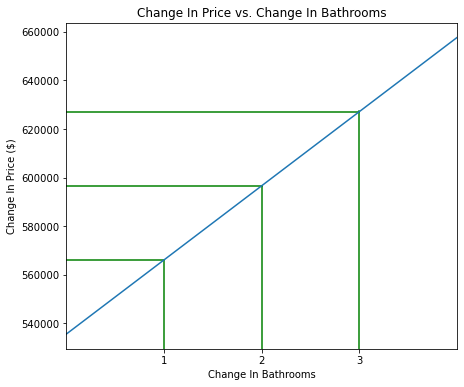

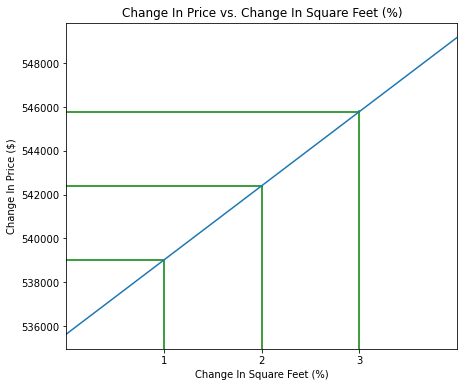

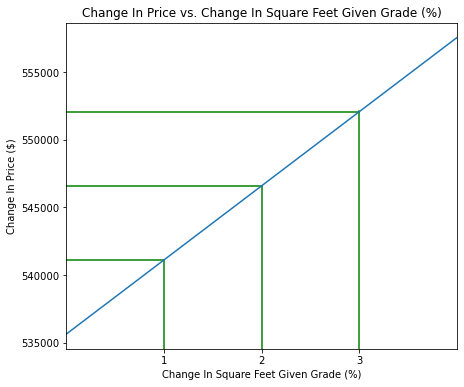

In [169]:
coeffs = [bathroom_impact_price, sqft_coeff, sqft_given_grade_coeff]

names = ['Bathrooms', 'Square Feet', 'Square Feet Given Grade']

#index = ['bathrooms', 'sqft_living', 'sqft_grade']

coeffs_names = zip(coeffs, names)

unlogged_price_df = df2['price'].map(lambda x:np.exp(x))

for co, name in coeffs_names:
    
    mean = unlogged_price_df.mean()
    
    fig, ax = plt.subplots(figsize = (7,6))
    
    x = [0,1,2,3,4]
    
    y = [(mean+(0*(mean*(co/100)))), (mean+(1*(mean*(co/100)))), (mean+(2*(mean*(co/100)))), (mean+(3*(mean*(co/100)))), (mean+(4*(mean*(co/100))))]
    
  
    
    ax.set_title(f'Change In Price vs. Change In {name} (%)')
    
    if name == 'Square Feet' or name == "Square Feet Given Grade":
        ax.set_title(f'Change In Price vs. Change In {name} (%)')
        ax.set_xlabel(f'Change In {name} (%)')
        
    else:
        ax.set_title(f'Change In Price vs. Change In {name}')
        ax.set_xlabel(f'Change In {name}')
        
    ax.set_ylabel(f'Change In Price ($)')
    ax.set_xticks([1,2,3])
    ax.set_xlim(0,4)
    #ax.set_ylim(0,4)
    #ax.set_yticks([np.arange()])
    xmax = [.25, .5, .75]
    y_xmax = zip(y[1:4],xmax)
    
    ticks_y = zip([1,2,3], [.27, .5, .73])
    
    for i,t in y_xmax:
        ax.axhline(i, xmax=t, color='g',linestyle='-',mew=.2)
        
    for a,b in ticks_y:
        ax.axvline(a, ymax=b, color='g', linestyle='-',mew=.2)

    plt.plot(x,y)
    #plt.savefig(f'{name}.png');

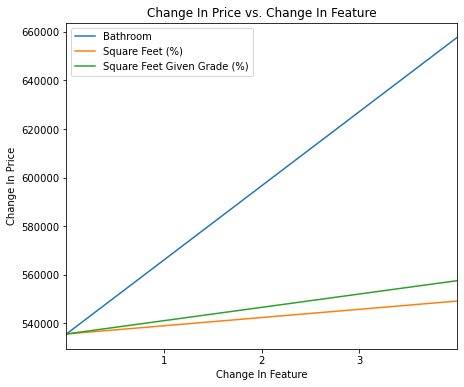

In [170]:
fig, ax = plt.subplots(figsize = (7,6))

ax.set_title(f'Change In Price vs. Change In Feature')
ax.set_xlabel(f'Change In Feature')
ax.set_ylabel(f'Change In Price')
ax.set_xticks([1,2,3])
ax.set_xlim(0,4)
#ax.set_ylim(0,4)

    
    
x = [0,1,2,3,4]
y1 = [(mean+(0*(mean*(coeffs[0]/100)))), (mean+(1*(mean*(coeffs[0]/100)))), (mean+(2*(mean*(coeffs[0]/100)))), (mean+(3*(mean*(coeffs[0]/100)))), (mean+(4*(mean*(coeffs[0]/100))))]
y2 = [(mean+(0*(mean*(coeffs[1]/100)))), (mean+(1*(mean*(coeffs[1]/100)))), (mean+(2*(mean*(coeffs[1]/100)))), (mean+(3*(mean*(coeffs[1]/100)))), (mean+(4*(mean*(coeffs[1]/100))))]
y3 = [(mean+(0*(mean*(coeffs[2]/100)))), (mean+(1*(mean*(coeffs[2]/100)))), (mean+(2*(mean*(coeffs[2]/100)))), (mean+(3*(mean*(coeffs[2]/100)))), (mean+(4*(mean*(coeffs[2]/100))))]


line1, = plt.plot(x,y1)
line2, = plt.plot(x,y2)
line3, = plt.plot(x,y3)


ax.legend([line1,line2,line3,], ['Bathroom', 'Square Feet (%)', 'Square Feet Given Grade (%)', 'Grade Given Square Feet'], loc = 'upper left')

#plt.savefig('price_vs_features.png');

    